In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
qb_data_path = "../Resources/Game_Logs_Quarterback.csv"
wr_te_data_path = "../Resources/Game_Logs_Wide_Receiver_and_Tight_End.csv"

# Read the data and the study results
qb_df = pd.read_csv(qb_data_path)
wr_te_df = pd.read_csv(wr_te_data_path)


In [20]:
#QB Step 1 (Cleaning the QB Data)

# A .loc is used to clean the data based on 4 criteria (year, regular season, passer rating, passing yards)

clean_qb_df = qb_df.loc[(
                        (qb_df['Year'] > 2000) & 
                        (qb_df['Season'] == 'Regular Season') & 
                        (qb_df['Passer Rating'] > 50) &
                        (qb_df['Passing Yards'] != '--')
)]

# A separate .loc was required to clean the df based on Passing Yards after "--" blank rows were removed

clean_qb_df = clean_qb_df.loc[(clean_qb_df['Passing Yards']).astype('int') > 100]

In [21]:
#QB Step 2

# A .drop() was used to further clean by dropping a several columns that would not be used

clean_qb_df = clean_qb_df.drop([
                                    'Player Id','Week','Game Date','Home or Away','Opponent','Score',
                                    'Games Played','Games Started','Rushing Attempts','Rushing Yards',
                                    'Yards Per Carry','Rushing TDs','Fumbles','Fumbles Lost',
                                    'Sacks','Sacked Yards Lost'], axis=1)

In [22]:
#QB Step 3

# A .replace() was used to change all W's to 1 and L's to 0, and T's to 0.5
# These values will be used later to calculate win pctg

clean_qb_df = clean_qb_df.replace({'Outcome': {'W': 1, 'L': 0, 'T': 0.5}})

# A .head() was ued to print the cleaned version of the QB df to the screen 

clean_qb_df.head()

,Name,Position,Year,Season,Outcome,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Passer Rating
47,"Savage, Tom",QB,2016,Regular Season,1.0,23,36,63.9,260,7.2,0,0,85.4
48,"Savage, Tom",QB,2016,Regular Season,1.0,18,29,62.1,176,6.1,0,0,79.1
73,"Savage, Tom",QB,2014,Regular Season,0.0,10,19,52.6,127,6.7,0,1,51.9
85,"Maddox, Tommy",NaN,2005,Regular Season,0.0,19,36,52.8,230,6.4,1,1,70.4
96,"Maddox, Tommy",NaN,2004,Regular Season,1.0,13,22,59.1,142,6.5,0,0,78.2


In [23]:
#QB Step 4

# A .astype() was used to convert various columns from string to float so that calculations could later be done.

clean_qb_df['Outcome'] = clean_qb_df['Outcome'].astype(float)
clean_qb_df['Passes Completed'] = clean_qb_df['Passes Completed'].astype(float)
clean_qb_df['Passes Attempted'] = clean_qb_df['Passes Attempted'].astype(float)
clean_qb_df['Completion Percentage'] = clean_qb_df['Completion Percentage'].astype(float)
clean_qb_df['Passing Yards'] = clean_qb_df['Passing Yards'].astype(float)
clean_qb_df['Passing Yards Per Attempt'] = clean_qb_df['Passing Yards Per Attempt'].astype(float)
clean_qb_df['TD Passes'] = clean_qb_df['TD Passes'].astype(float)
clean_qb_df['Ints'] = clean_qb_df['Ints'].astype(float)

# A .groupby() was used to group the dataframe by Player Name, 
# and then .mean() to determine the average for each individual player

qb_groupby = clean_qb_df.groupby('Name')

mean_qb = qb_groupby.mean()

mean_qb.head()


,Year,Outcome,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Passer Rating
Name,,,,,,,,,,
"Anderson, Derek",2008.575000,0.475000,17.875000,31.850000,56.200000,221.100000,7.0725,1.425000,0.900000,82.400000
"Banks, Tony",2001.666667,0.583333,14.500000,25.250000,58.416667,190.500000,7.8500,1.083333,0.666667,88.141667
"Bartel, Richard",2010.000000,0.000000,16.000000,28.000000,57.100000,150.000000,5.4000,0.000000,1.000000,57.100000
"Batch, Charlie",2004.687500,0.312500,18.625000,30.375000,62.206250,236.437500,8.2000,1.437500,1.125000,87.587500
"Beck, John",2009.285714,0.000000,16.571429,28.285714,57.271429,176.285714,6.3000,0.428571,0.571429,74.171429


r-value: r = 0.6546468374058456
r-squared value: r^2 = 0.42856248172547595


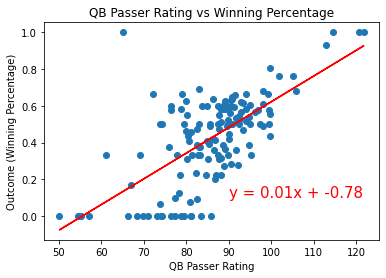

In [24]:
#QB Step 5 (Displaying the QB Data)

# Question: How are QB Passer Rating and Winning Percentage correlated?

# Scatter Plot and Regression Line show below

x_axis = mean_qb['Passer Rating']
y_axis = mean_qb['Outcome']

plt.title('QB Passer Rating vs Winning Percentage')
plt.xlabel('QB Passer Rating')
plt.ylabel('Outcome (Winning Percentage)')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(90,0.1),fontsize=15,color="red")

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r-value: r = " + str(corr_coeff[0]))
print("r-squared value: r^2 = " + str(rvalue * rvalue))

plt.scatter(x_axis, y_axis)
plt.show()

In [25]:
'''
QB Data Analysis

With an r value of 0.6546, this indicates somewhat of a strong positive correlation
between QB Passer Rating and Winning Percentage. 

With an r^2 value of 0.42856, this indicates that roughly 43% of the variation 
in winning percentage can be explained by QB Passer Rating.

'''

'\nQB Data Analysis\n\nWith an r value of 0.6546, this indicates somewhat of a strong positive correlation\nbetween QB Passer Rating and Winning Percentage. \n\nWith an r^2 value of 0.42856, this indicates that roughly 43% of the variation \nin winning percentage can be explained by QB Passer Rating.\n\n'

In [26]:
#WR Step 1

# A .loc is used to clean the data based on 4 criteria (year, regular season, position, yards per reception)

clean_wr_df = wr_te_df.loc[(
                        (wr_te_df['Year'] > 2000) & 
                        (wr_te_df['Season'] == 'Regular Season') & 
                        (wr_te_df['Position'] == 'WR')  & 
                        (wr_te_df['Yards Per Reception'] != '--')
)]


In [27]:
#WR Step 2

# A .drop() was used to further clean by dropping a several columns that would not be used

clean_wr_df = clean_wr_df.drop([
                                    'Player Id','Week','Game Date','Home or Away','Opponent','Score',
                                    'Games Played','Games Started','Rushing Attempts','Rushing Yards',
                                    'Yards Per Carry','Longest Rushing Run','Rushing TDs',
                                    'Fumbles','Fumbles Lost', 'Longest Reception'], axis=1)


In [28]:
#WR Step 3

# A .replace() was used to change all W's to 1 and L's to 0, and T's to 0.5
# These values will be used later to calculate win pctg

clean_wr_df = clean_wr_df.replace({'Outcome': {'W': 1, 'L': 0, 'T': 0.5}})

# A .head() was ued to print the cleaned version of the WR df to the screen 

clean_wr_df.head()

,Name,Position,Year,Season,Outcome,Receptions,Receiving Yards,Yards Per Reception,Receiving TDs
713,"Norwood, Kevin",WR,2014,Regular Season,0.0,1,4,4.0,0
714,"Norwood, Kevin",WR,2014,Regular Season,1.0,2,13,6.5,0
715,"Norwood, Kevin",WR,2014,Regular Season,1.0,1,19,19.0,0
718,"Norwood, Kevin",WR,2014,Regular Season,1.0,1,10,10.0,0
720,"Norwood, Kevin",WR,2014,Regular Season,1.0,2,22,11.0,0


In [29]:
#WR Step 4

# A .astype() was used to convert various columns from string to float so that calculations could later be done.

clean_wr_df['Outcome'] = clean_wr_df['Outcome'].astype(float)
clean_wr_df['Receptions'] = clean_wr_df['Receptions'].astype(float)
clean_wr_df['Receiving Yards'] = clean_wr_df['Receiving Yards'].astype(float)
clean_wr_df['Yards Per Reception'] = clean_wr_df['Yards Per Reception'].astype(float)
clean_wr_df['Receiving TDs'] = clean_wr_df['Receiving TDs'].astype(float)

# A .groupby() was used to group the dataframe by Player Name, 
# and then .mean() to determine the average for each individual player

wr_groupby = clean_wr_df.groupby('Name')

mean_wr = wr_groupby.mean()

mean_wr.head()

,Year,Outcome,Receptions,Receiving Yards,Yards Per Reception,Receiving TDs
Name,,,,,,
"Abbrederis, Jared",2015.200000,0.600000,2.000000,23.800000,10.860000,0.000000
"Adams, Davante",2015.047619,0.642857,3.880952,45.857143,11.759524,0.380952
"Agholor, Nelson",2015.565217,0.391304,2.565217,28.173913,10.704348,0.130435
"Aiken, Kamar",2015.051282,0.461538,3.282051,39.461538,11.371795,0.230769
"Allen, Keenan",2013.868421,0.500000,5.815789,68.868421,11.547368,0.421053


r-value: r = 0.11952012315056997
r-squared value: r^2 = 0.014285059837927433


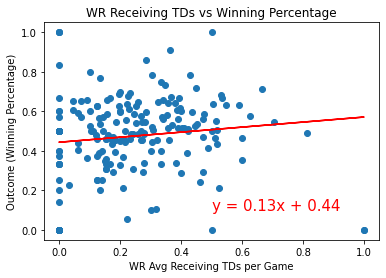

In [30]:
#WR Step 5 (Displaying the WR Data)

# Question: How are WR Receiving TDs and Winning Percentage correlated?

# Scatter Plot and Regression Line show below

x_axis = mean_wr['Receiving TDs']
y_axis = mean_wr['Outcome']

plt.title('WR Receiving TDs vs Winning Percentage')
plt.xlabel('WR Avg Receiving TDs per Game')
plt.ylabel('Outcome (Winning Percentage)')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0.5,0.1),fontsize=15,color="red")

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r-value: r = " + str(corr_coeff[0]))
print("r-squared value: r^2 = " + str(rvalue * rvalue))

plt.scatter(x_axis, y_axis)
plt.show()

In [31]:
'''
WR Data Analysis

With an r value of 0.1195, this indicates a weak positive correlation
between WR Avg Receiving Yards per Game and Winning Percentage. 

With an r^2 value of 0.01428, this indicates that roughly 1.4% of the variation 
in winning percentage can be explained by WR Avg Receiving Yards per Game.

'''

'\nWR Data Analysis\n\nWith an r value of 0.1195, this indicates a weak positive correlation\nbetween WR Avg Receiving Yards per Game and Winning Percentage. \n\nWith an r^2 value of 0.01428, this indicates that roughly 1.4% of the variation \nin winning percentage can be explained by WR Avg Receiving Yards per Game.\n\n'